## Advanced Machine Learning Project


### Iris Prediction



## Theoretical part - exploring the project: 
   
### Project Type - Classification;
   
### Project Description:
- This project focuses on developing a machine learning model to classify iris flowers into their respective species based on specific measurements. 
- Based on description, iris flowers are classified into three species: Setosa, Versicolor, and Virginica, each exhibiting distinct characteristics in terms of their physical measurements.


  
  
### Goal: 
  - The primary goal is to leverage ML techniques to build a classification model that can accurately identify the species of iris flowers based on their measurements. 
  

## Key Project Details: 

### Data:
The dataset used for this project consists of measurements from iris flowers belonging to the three species: Setosa, Versicolor, and Virginica. The key features are:

- Sepal length (cm)
- Sepal width (cm)
- Petal length (cm)
- Petal width (cm)

These measurements are used as the input to the classification model, with the species being the target variable.

### Machine Learning Model:
- The task involves the creation and training a machine learning model to learn from the provided data and accurately classify iris flowers into one of the three species based on their measurements. 
- The model will be trained on a labeled dataset (train.csv) where each flower's species is known, and then it will be used to make predictions on unseen data (test.csv). This process can help streamline and automate iris species classification.


### Problem Statement:
The iris flower, a distinctive genus of flowering plants, includes three primary species: Iris Setosa, Iris Versicolor, and Iris Virginica. These species differ in their physical traits, particularly in the sepal and petal dimensions. 
- The problem is to develop a machine learning model capable of distinguishing between these species based on their respective measurements.

### Objective:
- This project aims to create an ML model that learns from the measurements of iris flowers and accurately classifies them into their respective species.


- The model will automate this classification process, contributing to a more efficient way of identifying iris species based on distinct characteristics.

## Practical part:

### 1. Data Preprocessing


#### 1.1 Import Libraries

In [497]:
# data processing & data wrangling
import numpy as np
import pandas as pd

# visualization tools
import matplotlib.pyplot as plt
import seaborn as sns

# evaluation metric libraries
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report

# data preprocessing
from sklearn.preprocessing import LabelEncoder

# model selection libraries
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, RepeatedStratifiedKFold

# ML Model implementation
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb

# ignore warnings
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

#### 1.2 Data Overview:

##### Loading the datasets: 

In [498]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

In [499]:
# training dataset first look top
df_train.head()

,id,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,81,5.5,2.4,3.7,1.0,1
1,133,6.3,2.8,5.1,1.5,2
2,137,6.4,3.1,5.5,1.8,2
3,75,6.6,3.0,4.4,1.4,1
4,109,7.2,3.6,6.1,2.5,2


In [500]:
# Training dataset first look bottom  
df_train.tail()

,id,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
100,71,6.1,2.8,4.0,1.3,1
101,106,4.9,2.5,4.5,1.7,2
102,14,5.8,4.0,1.2,0.2,0
103,92,5.8,2.6,4.0,1.2,1
104,102,7.1,3.0,5.9,2.1,2


#### 1.3 Handle missing/duplicate data:  Missing Values/Null Values:
It’s good practice to check for missing values not only in the train dataset, but in the test dataset as well, because the model might encounter problems if any features required for prediction are missing. However, we do not modify the test data during EDA, we can address any issues with the test dataset when making predictions later.

In [501]:
df_train.isnull().sum()

id                   0
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

In [502]:
df_test.isnull().sum()

id                   0
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

##### Duplicate Values:
Lets check for duplicates both datasets, but in case of any issues in test data, we don't remove duplicates as the test set is supposed to represent new, unseen data, and the goal is to evaluate our model’s performance on it. Removing duplicates here would not be ideal because the test data is fixed for evaluation purposes.

In [503]:
duplicate_train = df_train.duplicated().sum()
print(f'number of duplicated rows are {duplicate_train}')
duplicate_test = df_test.duplicated().sum()
print(f'number of duplicated rows are {duplicate_test}')

number of duplicated rows are 0
number of duplicated rows are 0


#### Summary of 1st part:


- No duplicate values exist.

- No Null values exist.

## Part 2 - Exploratory Data Analysis (EDA)

Since the data that was given is splitted already, we have two datasets—train.csv and test.csv.
I will focus on EDA using the training dataset.

Test data will remain unseen until the model evaluation phase. Using the test data for EDA could introduce bias, as it would give insights that might affect the generalization performance of the model on unseen data.

Lets keep test.csv file for the final model evaluation to maintain the integrity of the competition and ensure I'm evaluating the model’s performance properly.

So the primary focus of EDA is based on the train dataset.

#### 2.1 Understanding The Variables 
##### Datasets Rows & Columns overview:

In [504]:
# number of rows and columns of the train dataset
print("Number of rows in training data : ",df_train.shape[0])
print("Number of columns in training data: ",df_train.shape[1])

Number of rows in training data :  105
Number of columns in training data:  6


In [505]:
# number of rows and columns of the test dataset
print("Number of rows in training data : ",df_test.shape[0])
print("Number of columns in training data: ",df_test.shape[1])

Number of rows in training data :  45
Number of columns in training data:  5


In [506]:
# training dataset columns
df_train.columns

Index(['id', 'sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target'],
      dtype='object')

In [507]:
# testing dataset columns
df_test.columns

Index(['id', 'sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

#### 2.2 Basic Descriptive Statistics: 
##### Statistical summary of numeric features in training dataset describe includes all columns:


In [508]:
df_train.describe(include= 'all').round(2)

,id,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,105.00,105.00,105.00,105.00,105.00,105.00
mean,77.70,5.84,3.01,3.87,1.24,1.06
std,42.08,0.83,0.42,1.72,0.74,0.81
min,0.00,4.30,2.00,1.10,0.10,0.00
25%,44.00,5.10,2.80,1.70,0.40,0.00
50%,81.00,5.80,3.00,4.30,1.30,1.00
75%,113.00,6.40,3.30,5.10,1.80,2.00
max,149.00,7.70,4.20,6.70,2.50,2.00


#### 2.3 Summary information about training data

In [509]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 105 non-null    int64  
 1   sepal length (cm)  105 non-null    float64
 2   sepal width (cm)   105 non-null    float64
 3   petal length (cm)  105 non-null    float64
 4   petal width (cm)   105 non-null    float64
 5   target             105 non-null    int64  
dtypes: float64(4), int64(2)
memory usage: 5.0 KB


#### 2.4 Unique Values for each variable:

In [510]:
# Check Unique Values for each variable.
for i in df_train.columns.tolist():
    print("For train dataset - Number of unique values in",i,"is",df_train[i].nunique())
    
for i in df_test.columns.tolist():
    print("For test dataset - Number of unique values in",i,"is",df_test[i].nunique())

For train dataset - Number of unique values in id is 105
For train dataset - Number of unique values in sepal length (cm) is 34
For train dataset - Number of unique values in sepal width (cm) is 21
For train dataset - Number of unique values in petal length (cm) is 39
For train dataset - Number of unique values in petal width (cm) is 22
For train dataset - Number of unique values in target is 3
For test dataset - Number of unique values in id is 45
For test dataset - Number of unique values in sepal length (cm) is 24
For test dataset - Number of unique values in sepal width (cm) is 18
For test dataset - Number of unique values in petal length (cm) is 21
For test dataset - Number of unique values in petal width (cm) is 16


#### 2.5 Data Wrangling

In [511]:
# We do not need the 1st column "id" so let's drop it
train_data = df_train.iloc[:,1:]
test_data = df_test.iloc[:,1:]

In [512]:
train_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.5,2.4,3.7,1.0,1
1,6.3,2.8,5.1,1.5,2
2,6.4,3.1,5.5,1.8,2
3,6.6,3.0,4.4,1.4,1
4,7.2,3.6,6.1,2.5,2


In [513]:
test_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,6.1,2.8,4.7,1.2
1,5.7,3.8,1.7,0.3
2,7.7,2.6,6.9,2.3
3,6.0,2.9,4.5,1.5
4,6.8,2.8,4.8,1.4




#### Summary of 2nd part (2.1 - 2.5):
- The train.csv and test.csv datasets consist of length and width mesurements of sepal and petal for different species in centimeter with one difference - target variable in train.csv dataset. 
- Target variable consist species of the iris flower (setosa, versicolor, virginica) that we have to predict using testing data;
- There are 105 rows and 6 columns provided in the train.csv dataset.
- There are 45 rows and 5 columns provided in the test.csv dataset.


#### 2.6 Univariate Analysis: 

### Chart 1 - Histogram visualization for distribution of numerical variables

In the next step I generate histogram to visualize the distribution of the four numerical variables in the train dataset, namely sepal length, sepal width, petal length, and petal width. 

For easy comparison the plots organizesd in a 2x2 grid of subplots. 

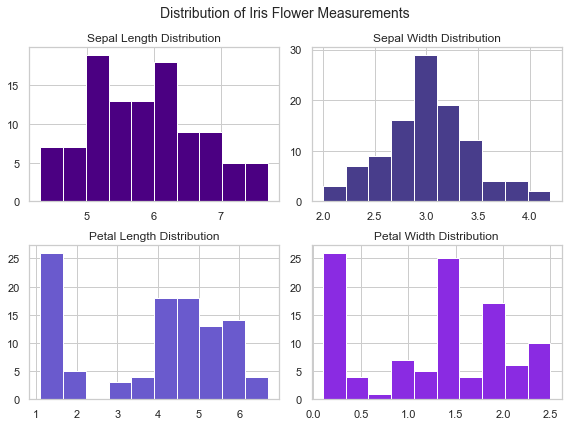

In [514]:
# a figure with subplots

plt.figure(figsize=(8, 6))
plt.suptitle('Distribution of Iris Flower Measurements', fontsize=14)

# 2x2 grid of subplots
plt.subplot(2, 2, 1)  # subplot 1 (top-left)
plt.hist(train_data['sepal length (cm)'], color='indigo')
plt.title('Sepal Length Distribution')

plt.subplot(2, 2, 2)  # subplot 2 (top-right)
plt.hist(train_data['sepal width (cm)'], color='darkslateblue')
plt.title('Sepal Width Distribution')

plt.subplot(2, 2, 3)  # subplot 3 (bottom-left)
plt.hist(train_data['petal length (cm)'], color='slateblue')
plt.title('Petal Length Distribution')

plt.subplot(2, 2, 4)  # subplot 4 (bottom-right)
plt.hist(train_data['petal width (cm)'], color='blueviolet')
plt.title('Petal Width Distribution')

# visualisation of the subplots
plt.tight_layout()
plt.show()

##### Based on the chart 1 results from each histogram:

- Sepal Length Distribution:
The distribution of the sepal length shows a uniform spread with peaks around 5.0 cm and 6.0 cm.
The data appears to be more concentrated in the middle range, from approximately 4.5 cm to 7.0 cm, with relatively fewer values on the extremes (less than 4.5 cm and more than 7.5 cm).
There is no distinct skewness, but the distribution seems to have multiple peaks, indicating that probably the sepal length varies across the different iris species.
- Sepal Width Distribution
The sepal width is more normally distributed, resembling a bell curve with the highest concentration around 3.0 cm.
There is a gradual tapering off on both sides, with values ranging between 2.0 cm and 4.0 cm.
The majority of the data falls between 2.5 cm and 3.5 cm, indicating that the sepal width is less varied compared to the sepal length.
- Petal Length Distribution
The petal length shows a more bimodal distribution, with a significant concentration of values around 1.0 cm and another cluster between 4.5 cm and 6.0 cm.
This suggests a stark difference in petal length between different iris species. Some species have much shorter petals, while others have significantly longer ones.
The histogram reveals that petal length is a strong feature that may help in distinguishing between the iris species.
- Petal Width Distribution
Petal width also displays a bimodal distribution, with peaks around 0.0 cm and 1.5 cm.
This strong separation between smaller and larger values is indicative of different groups within the dataset, where one species has much narrower petals compared to the others.
As with petal length, this variable appears to be a key differentiator among the iris species.

##### Overall Insights:
- Sepal measurements (length and width) have a more even or normal distribution, but the variability isn't as distinct as the petal measurements.
- Petal measurements (length and width) exhibit more pronounced bimodal distributions, which strongly suggests that they will be highly useful in distinguishing between iris species in the classification task.
- Chart 1 histograms suggest that petal length and width are likely more influential features in building our machine learning model, as they show clearer differences across the species.


#### 2.7 Bivariate Analysis

### Chart 2 - Scatter plot visualization for Sepal Length vs Sepal Width:


Lets observe the relationship between Sepal Length and Sepal Width for the three species of Iris flowers: setosa, versicolor, and virginica. 

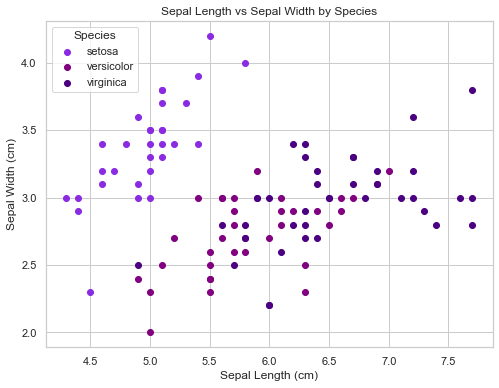

In [515]:
# define colors and species names for the corresponding target values
colors = ['blueviolet', 'purple', 'indigo']
species = ['setosa', 'versicolor', 'virginica']  # actual species names
target = [0, 1, 2]

# creating a scatter plot for Sepal Length vs Sepal Width for each species
plt.figure(figsize=(8, 6))
for i in range(3):
    x = train_data[train_data['target'] == target[i]]
    
    # creating a scatter plot with the specified color and label for the current species
    plt.scatter(x['sepal length (cm)'], x['sepal width (cm)'], c=colors[i], label=species[i])

plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Sepal Length vs Sepal Width by Species')
plt.legend(title='Species')
plt.show()


##### Based on the chart 2:

- Setosa (Blueviolet):

Cluster Location: Setosa forms a distinct cluster in the upper-left corner of the plot, where sepal width is larger (ranging from 3.0 cm to 4.5 cm) and sepal length is shorter (between 4.5 cm and 5.5 cm).

Clear Separation: Setosa is well-separated from both versicolor and virginica, particularly due to its wider sepal width and shorter sepal length. This makes it easy to distinguish from the other species using sepal measurements alone.

- Versicolor (Purple):

Cluster Location: Versicolor is positioned in the middle of the plot, with sepal length ranging from 5.0 cm to 6.5 cm and sepal width between 2.5 cm and 3.5 cm.

Overlap with Virginica: Versicolor shows some overlap with virginica, especially at the lower end of virginica’s range for sepal length. This suggests that while versicolor has a moderately distinct cluster, it may not be as easily distinguishable from virginica based on sepal length and width alone.

- Virginica (Indigo):

Cluster Location: Virginica occupies the right side of the plot, with sepal length values ranging from 6.0 cm to 7.5 cm and sepal width between 2.5 cm and 3.5 cm.

Overlap with Versicolor: There is significant overlap between virginica and versicolor in terms of sepal width, though virginica generally has a longer sepal length. This overlap suggests that additional features, such as petal dimensions, may be necessary to fully distinguish between the two species.

##### Overall Insights:
The chart effectively demonstrates that sepal measurements alone can separate setosa from the other two species but are less effective at clearly separating versicolor from virginica.
Sepal Length appears to be a more distinguishing feature than Sepal Width when comparing all three species, especially between versicolor and virginica.


### Chart 3 - Scatter plot visualization for Petal Length vs Petal Width.

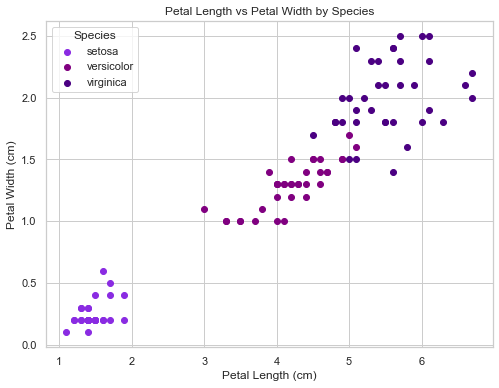

In [516]:
# creating a scatter plot for Sepal Length vs Sepal Width for each species
plt.figure(figsize=(8, 6))
for i in range(3):
    x = train_data[train_data['target'] == target[i]]
    
    # creating a scatter plot with the specified color and label for the current species
    plt.scatter(x['petal length (cm)'], x['petal width (cm)'], c=colors[i], label=species[i])

plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Petal Length vs Petal Width by Species')
plt.legend(title='Species')
plt.show()

##### Based on the chart 3:

- Setosa (Blueviolet):

Cluster Location: Setosa is tightly clustered in the lower-left corner of the plot. Its petal length ranges from about 1.0 cm to 1.9 cm, and petal width ranges from about 0.0 cm to 0.6 cm.

Distinct Separation: Setosa shows clear separation from the other two species, making it easily distinguishable based on petal dimensions. This cluster indicates that petal length and petal width are highly effective features for identifying Setosa.

- Versicolor (Purple):

Cluster Location: Versicolor points are located in the middle of the plot, with petal length ranging from 3.0 cm to 5.0 cm and petal width from about 1.0 cm to 1.8 cm.

Slight Overlap: There is some overlap between the upper range of versicolor and the lower range of virginica. 

- Virginica (Indigo):

Cluster Location: Virginica exhibits the largest values for both petal length and petal width, with petal length ranging from 4.5 cm to 6.9 cm and petal width from about 1.5 cm to 2.5 cm.

Separation from Setosa: Virginica is well separated from setosa in terms of both petal length and width, though there is some overlap with versicolor at the lower range of virginica’s petal length.

##### Overall Insights:
The chart effectively demonstrates that petal measurements (length and width) can very clearly separate setosa from the other two species, as it forms a distinct cluster in the lower-left corner. Additionally, petal measurements provide much better separation between versicolor and virginica compared to sepal measurements. In particular, Petal Length appears to be a more distinguishing feature than Petal Width, especially when comparing versicolor and virginica. As virginica has significantly larger petal dimensions, petal length and width are more effective at differentiating these species, making them strong predictors in classification tasks.

### Chart 4 - Scatter plot visualization for Sepal Length vs Petal Length.

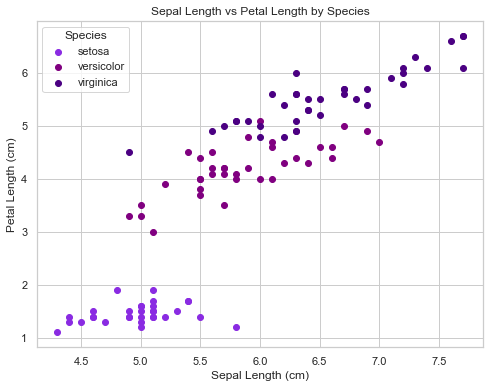

In [517]:
# creating a scatter plot for Sepal Length vs Petal Length for each species
plt.figure(figsize=(8, 6))
for i in range(3):
    x = train_data[train_data['target'] == target[i]]
    
    # creating a scatter plot with the specified color and label for the current species
    plt.scatter(x['sepal length (cm)'], x['petal length (cm)'], c=colors[i], label=species[i])

plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal Length (cm)')
plt.title('Sepal Length vs Petal Length by Species')
plt.legend(title='Species')
plt.show()

#### Based on chart 4: 

- Setosa (Blueviolet):

Cluster Location: Setosa forms a tight cluster in the bottom-left corner of the plot. Sepal length for setosa ranges between 4.5 cm to 5.5 cm, while petal length is much smaller, staying consistently between 1.0 cm to 2.0 cm.

Clear Separation: Setosa is clearly distinguishable from both versicolor and virginica. Its shorter petal length is a key feature that separates it distinctly from the other two species, as no overlap occurs with the higher petal lengths of versicolor and virginica.

- Versicolor (Purple):

Cluster Location: Versicolor occupies the middle of the plot, with sepal length ranging from 5.0 cm to 6.5 cm and petal length between 3.0 cm to 5.0 cm.

Overlap with Virginica: There is some overlap with virginica, particularly in the 5.0 cm to 6.0 cm sepal length range. Versicolor tends to have a slightly smaller petal length compared to virginica, but the overlap in their ranges suggests that additional features (such as petal width) might be needed for a more accurate separation.

- Virginica (Indigo):

Cluster Location: Virginica occupies the top-right region of the plot, with the largest values for both sepal length (ranging from 6.0 cm to 7.5 cm) and petal length (between 4.5 cm to 6.9 cm).

Overlap with Versicolor: There is some overlap between virginica and versicolor in the lower range of virginica's petal length (between 4.5 cm and 5.0 cm), but virginica generally occupies a higher range in both sepal and petal lengths, making it possible to distinguish it from versicolor at the extreme ends.


##### Overall Insights:
Sepal Length and Petal Length provide good separation between species. While setosa forms a distinct, easily separable cluster with much shorter petal lengths and smaller sepal lengths compared to the other two species, the overlap between versicolor and virginica, particularly in the mid-range of sepal length (around 5.0 cm to 6.5 cm) and petal length (around 4.5 cm to 5.0 cm), suggests that petal length and sepal length alone may not fully separate them. Still, the trend shows that virginica generally has longer sepals and petals, which can help separate it from versicolor in most cases.
Petal Length appears to be a key feature for distinguishing these species, especially in separating setosa from versicolor and virginica.

### Chart 5 - Scatter plot visualization  for Sepal Width vs Petal Width.


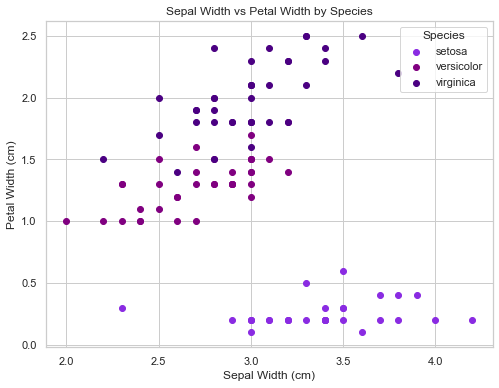

In [518]:
# creating a scatter plot for Sepal Width vs Petal Width for each species
plt.figure(figsize=(8, 6))
for i in range(3):
    x = train_data[train_data['target'] == target[i]]
    
    # creating a scatter plot with the specified color and label for the current species
    plt.scatter(x['sepal width (cm)'], x['petal width (cm)'], c=colors[i], label=species[i])

plt.xlabel('Sepal Width (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Sepal Width vs Petal Width by Species')
plt.legend(title='Species')
plt.show()

#### Based on Chart 5:

- Setosa (Blueviolet):

Cluster Location: Setosa forms a distinct horizontal cluster at the bottom of the plot. The sepal width ranges from 2.5 cm to 4.0 cm, while the petal width remains consistently small, ranging from 0.0 cm to 0.6 cm.

Clear Separation: Setosa’s small petal width and relatively larger sepal width make it easily distinguishable from versicolor and virginica. It forms a distinct cluster, similar to previous plots, showing clear separation from the other species.

- Versicolor (Purple):

Cluster Location: Versicolor occupies the middle section of the plot. Sepal width ranges from 2.0 cm to 3.5 cm, while petal width varies between 1.0 cm and 1.8 cm.

Overlap with Virginica: There is significant overlap between versicolor and virginica in both sepal width and petal width. Although the petal width for versicolor is generally smaller, the overlap makes it more difficult to distinguish these species based solely on these two features.

- Virginica (Indigo):

Cluster Location: Virginica is mostly found in the top-right region of the plot. Sepal width ranges from 2.5 cm to 3.5 cm, and petal width is between 1.4 cm and 2.5 cm.

Overlap with Versicolor: There is considerable overlap between virginica and versicolor, particularly around sepal width values of 2.5 cm to 3.5 cm. However, virginica typically has a larger petal width, especially toward the upper range of the plot, where it tends to have the largest petal widths.

##### Overall Insights:

Setosa forms a well-separated cluster, with significantly smaller petal width, making it easy to distinguish.
Versicolor and virginica overlap significantly in both sepal width and petal width, making it challenging to separate these species based solely on these two features.
Petal width remains an important feature for distinguishing between the species, particularly in separating setosa from the others. However, to further differentiate between versicolor and virginica, other features (such as petal length) may need to be considered.


### Chart 6 - Count Plot of Sepal Length Distribution Across Iris Species

This count plot visualizes the distribution of sepal length values across the three Iris species (Setosa, Versicolor, and Virginica). It gives us more detailed representation than in Chart 1. 

The bars represent the frequency of each sepal length value, and the color divisions indicate the contribution of each species to the overall count for that sepal length.

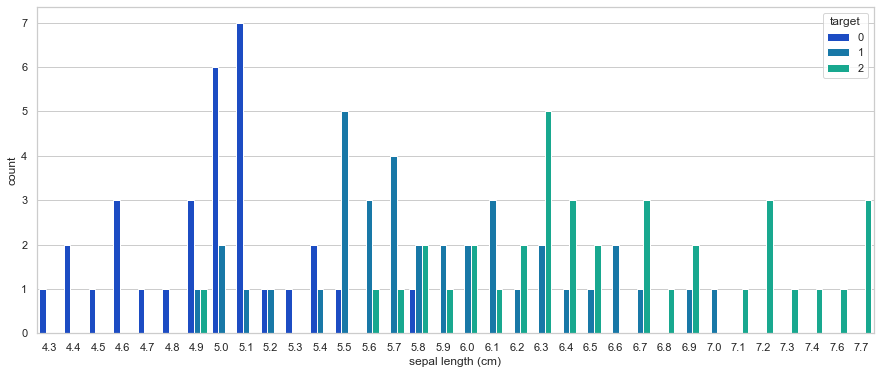

In [519]:
plt.figure(figsize =(15,6))
sns.countplot(x='sepal length (cm)', data=train_data, hue= train_data['target'], palette= 'winter')
plt.show()

##### Based on Chart 6: 

- Setosa (0-blue): Most of the Setosa flowers have a smaller sepal length, with peaks at 4.9 cm and 5.0 cm. Setosa species are largely clustered towards the left side of the plot (smaller sepal lengths), showing that Setosa flowers typically have shorter sepals.

- Versicolor (1-green): The Versicolor species covers a broader range of sepal lengths, with notable peaks at 6.0 cm and 5.5 cm. This species is spread out over the middle portion of the plot, indicating that it generally has medium-sized sepals.

- Virginica (2-teal): Virginica species generally have larger sepals, with peaks at 6.3 cm, 6.6 cm, and 7.2 cm. This species dominates the right side of the plot, reflecting that Virginica flowers have longer sepals.

##### Overall Insights:
This plot clearly shows a separation of species based on sepal length. Setosa has the shortest sepals, while Virginica has the longest. Versicolor occupies the middle range of sepal lengths. This indicates that sepal length is a distinguishing feature for species classification in the Iris dataset.



### Chart 7 - Count Plot of Sepal Width Distribution Across Iris Species¶

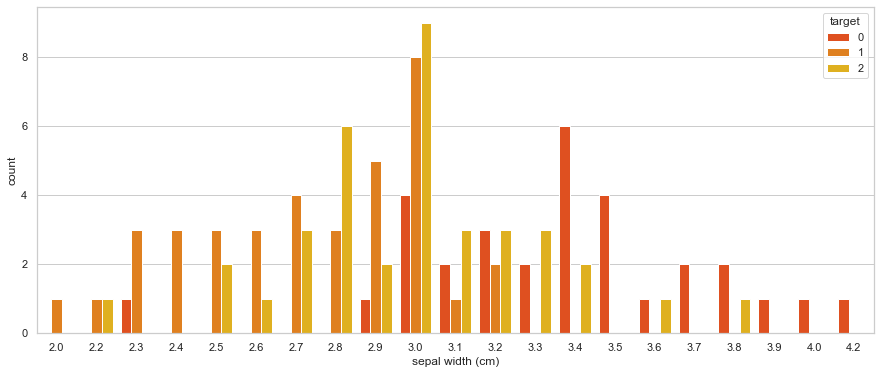

In [520]:
plt.figure(figsize =(15,6))
sns.countplot(x='sepal width (cm)', data=train_data, hue= train_data['target'], palette= 'autumn')
plt.show()

##### Based on Chart 7: 

- Setosa (0 - orange): The Setosa species tends to have relatively wider sepals, with notable counts at 3.4 cm, 3.5 cm, and 3.6 cm. This indicates that Setosa flowers typically have sepals that are wider than those of the other species.

- Versicolor (1 - light orange): Versicolor appears more frequently in the middle range of 2.5 cm to 3.1 cm. This indicates that Versicolor flowers generally have medium-width sepals compared to the other two species.

- Virginica (2 - yellow): Virginica has a broader distribution, with peaks at 2.7 cm, 3.0 cm, and 3.2 cm, indicating that it covers a slightly wider range than Versicolor, but still does not overlap with Setosa’s wider sepals.


##### Overall Insights:
The plot shows that sepal width is a distinguishing feature, particularly for Setosa, which has noticeably wider sepals than both Versicolor and Virginica. Versicolor and Virginica overlap more in terms of sepal width, although Virginica generally has a broader range of sepal width values.



### Chart 8 - Count Plot of Petal Length Distribution Across Iris Species

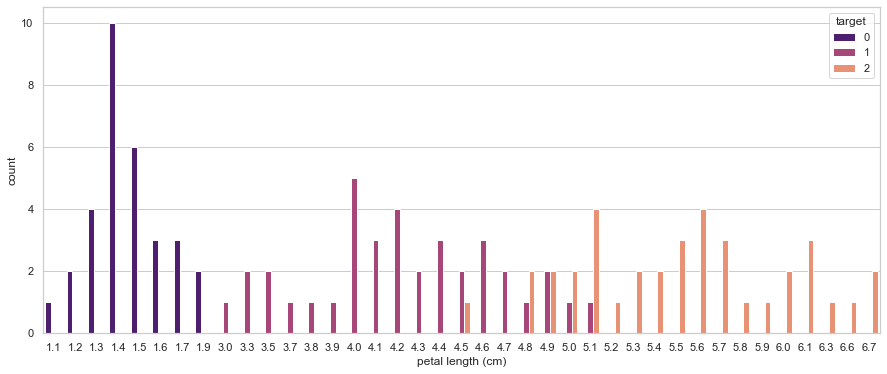

In [521]:
plt.figure(figsize =(15,6))
sns.countplot(x='petal length (cm)', data=train_data, hue= train_data['target'], palette= 'magma')
plt.show()

##### Based on Chart 8:
- Setosa (0): Setosa species is dominant on the left side of the plot, with petal lengths ranging from 1.1 cm to 1.9 cm, with a peak around 1.4 cm. This indicates that Setosa flowers tend to have much smaller petals compared to the other two species.

- Versicolor (1): Versicolor species is more prevalent in the middle range of petal lengths, between 3.0 cm and 5.1 cm, with peaks around 4.0 cm and 4.5 cm. This suggests that Versicolor has medium-sized petals compared to the other species.

- Virginica (2): Virginica species appears mostly on the right side, with petal lengths between 4.5 cm and 6.7 cm, and peaks at 5.1 cm, 5.7 cm, and 6.3 cm. Virginica has the longest petal lengths, distinguishing it clearly from Setosa and somewhat from Versicolor.

##### Overall Insights:
This chart clearly shows that petal length is a key feature that differentiates the three species of Iris flowers. Setosa has significantly shorter petals, while Virginica tends to have the longest petals, and Versicolor falls in between, with a moderate range of petal lengths. This pattern suggests that petal length is an important distinguishing characteristic for species classification.



### Chart 9 - Count Plot of Petal Width Distribution Across Iris Species

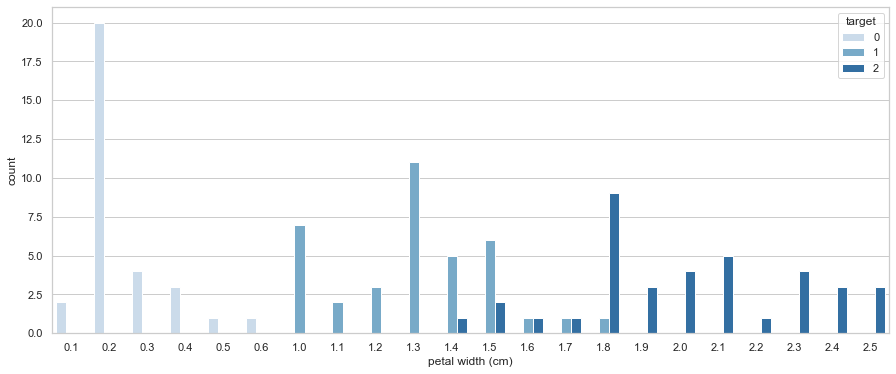

In [522]:
plt.figure(figsize =(15,6))
sns.countplot(x='petal width (cm)', data=train_data, hue= train_data['target'], palette= 'Blues')
plt.show()

##### Based on Chart 8:

- Setosa (0): Setosa is mostly concentrated on the left side, with petal widths between 0.1 cm and 0.6 cm, and the highest count is for a petal width of 0.2 cm. This pattern shows that Setosa has the narrowest petal widths among the three species.

- Versicolor (1): Versicolor appears in the middle range of petal widths, between 1.0 cm and 1.8 cm, with peaks around 1.3 cm and 1.8 cm. This suggests that Versicolor has moderately wider petals compared to Setosa, but still narrower than Virginica.

- Virginica (2): Virginica is represented mostly in the right side, with petal widths between 1.6 cm and 2.5 cm, and peaks at 1.8 cm and 2.2 cm. Virginica species has the widest petal widths overall, making it easy to distinguish from the other two species.

##### Overall Insights:
This plot highlights how petal width is a distinguishing feature for the Iris species. Setosa has the narrowest petal widths, Virginica has the widest, and Versicolor falls in between. These clear differences in petal width make it an important characteristic for classification.



### Chart 10 - Correlation Heatmap Visualization


Lets plot a table showing correlation coefficients between variables in a dataset. It helps to understand how different features are related to each other in terms of linear relationships.

In this project, the correlation matrix helps in identifying which features of the iris flowers (sepal length, sepal width, petal length, and petal width) are strongly related and which features might be independent. This is useful for determining which features are most important in classifying the iris species.

A value of 1 means a perfect positive linear relationship (as one feature increases, the other also increases).
A value of -1 means a perfect negative linear relationship (as one feature increases, the other decreases).
A value close to 0 indicates no linear relationship between the features.

We do not need the target variable (which represents the species labels) in our correlation matrix. This is because the correlation matrix is primarily used to analyze the linear relationships between numerical features in the dataset. The target column is categorical (even if encoded numerically), so its inclusion in the correlation matrix doesn’t provide meaningful insights for feature relationships and just lead to confusion.

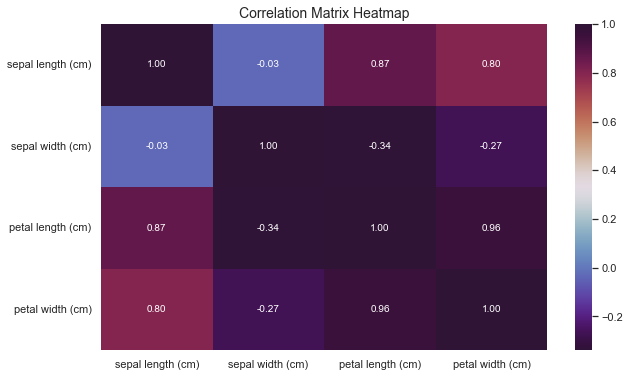

In [523]:
# Exclude the 'target' column when calculating the correlation matrix
corr_matrix = train_data.drop(columns=['target']).corr()

# Plot the Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='twilight_shifted', fmt='.2f')

# Setting Labels
plt.title('Correlation Matrix Heatmap', fontsize=14)

# Display the Chart
plt.show()

1. Petal Length:
- Petal Width: Petal length has a very strong positive correlation with petal width (0.96). This indicates that as petal length increases, petal width also increases almost proportionally.
- Sepal Length: Petal length is also strongly positively correlated with sepal length (0.87). This suggests that flowers with longer petals tend to also have longer sepals.
- Sepal Width: Petal length has a moderate negative correlation with sepal width (-0.34). This means that flowers with wider sepals tend to have slightly shorter petals, but the relationship is weak.

2. Petal Width:
- Petal Length: As already mentioned, petal width is very strongly correlated with petal length (0.96). This strong relationship suggests that both petal dimensions increase together.
- Sepal Length: Petal width has a strong positive correlation with sepal length (0.80). Flowers with wider petals tend to have longer sepals, though the relationship is not as strong as with petal length.
- Sepal Width: Petal width is weakly negatively correlated with sepal width (-0.27). This means that flowers with wider sepals tend to have slightly narrower petals, but the relationship is weak.

3. Sepal Length:
- Petal Length: Sepal length is strongly positively correlated with petal length (0.87). Longer sepals tend to accompany longer petals.
- Petal Width: Sepal length also has a strong positive correlation with petal width (0.80). This suggests that flowers with longer sepals tend to have wider petals.
- Sepal Width: Sepal length has an almost zero correlation with sepal width (-0.03), meaning there is virtually no relationship between these two features.

4. Sepal Width:
- Sepal Length: Sepal width shows no meaningful correlation with sepal length (-0.03), indicating that the length of the sepals and their width vary independently.
- Petal Length: Sepal width is moderately negatively correlated with petal length (-0.34). This means that flowers with wider sepals tend to have slightly shorter petals, but the relationship is weak.
- Petal Width: Sepal width also shows a weak negative correlation with petal width (-0.27), suggesting that wider sepals are weakly associated with narrower petals.


##### Summary:
- Petal dimensions (length and width) are highly correlated with each other, suggesting they will likely be crucial features for classification.
- Sepal length is positively correlated with both petal length and petal width, making it a useful feature, though slightly less so than petal dimensions.
- Sepal width has weak or no correlations with other features, suggesting it may not be as important for classification.


### Part 3 - Feature Scaling

#### 3.1 Standardization train and test sets using StandardScaler.

Features like sepal length, sepal width, petal length, and petal width are measured in centimeters, and the ranges of these features can vary significantly.
Models like Logistic Regression, SVM, and Neural Networks are sensitive to the range of input values and perform better when the data is scaled. For example, in the train dataset, petal length ranges from around 1.2 cm to 6.1 cm, and petal width ranges from 0.2 cm to 2.5 cm. These different ranges can affect the performance of distance-based algorithms.

We should apply scaling to both the train and test datasets. Fit the scaler on the training data and then transform both the training and test datasets using the same scaler. This ensures that both datasets are on the same scale without any data leakage.

In [524]:
from sklearn.preprocessing import StandardScaler

# define features (x) and target (y) for training data
x_train = train_data.drop(columns=['target'])
y_train = train_data['target']

scaler = StandardScaler()
# fit the scaler on the training data
scaler.fit(x_train)

# transform both the training and test data
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(test_data) 

Since the project provides us with train.csv and test.csv, we do not need to manually split the data using train_test_split(). The test set (test.csv) does not include the target labels (y_test), which means we won’t have y_test unless the true labels are released later for evaluation (because of competition).

#### 3.2 Checking the train distribution of dependent variable

In [525]:
y_train.value_counts()

1    37
2    37
0    31
Name: target, dtype: int64

### Part 4 - ML models

Because we do not have y_test, we will train models on the training data and use the test data solely for predictions.

### 4.1 Logistic Regression


Step 1: Import Logistic Regression and initialize the model

In [526]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(random_state=42)

Step 2: Fit the model on the scaled training data

In [527]:
lr_model.fit(x_train_scaled, y_train)

LogisticRegression(random_state=42)

Step 3: Make Predictions on the Scaled Test Data

In [528]:
# (for evaluation) 
y_pred_train_lr = lr_model.predict(x_train_scaled)

# (for submission) 
y_pred_test_lr = lr_model.predict(x_test_scaled)

Step 4: Evaluate the Logistic Regression on the training data

In [529]:
print("Logistic Regression - Training Accuracy:", accuracy_score(y_train, y_pred_train_lr))
print("Confusion Matrix (Train - Logistic Regression):\n", confusion_matrix(y_train, y_pred_train_lr))
print("Classification Report (Train - Logistic Regression):\n", classification_report(y_train, y_pred_train_lr))

Logistic Regression - Training Accuracy: 0.9619047619047619
Confusion Matrix (Train - Logistic Regression):
 [[31  0  0]
 [ 0 34  3]
 [ 0  1 36]]
Classification Report (Train - Logistic Regression):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       0.97      0.92      0.94        37
           2       0.92      0.97      0.95        37

    accuracy                           0.96       105
   macro avg       0.96      0.96      0.96       105
weighted avg       0.96      0.96      0.96       105



### 4.2 Random Forest

Step 1: Import Random Forest and train the model

In [530]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

Step 2: Fit the model on the scaled training data

In [531]:
rf_model.fit(x_train_scaled, y_train)

RandomForestClassifier(random_state=42)

Step 3: Make Predictions Using Random Forest

In [532]:
# for evaluation) 
y_pred_train_rf = rf_model.predict(x_train_scaled)

# (for submission)
y_pred_test_rf = rf_model.predict(x_test_scaled)

Step 4: Evaluate the Random Forest on the training data

In [533]:
print("Random Forest - Training Accuracy:", accuracy_score(y_train, y_pred_train_rf))
print("Confusion Matrix (Train):\n", confusion_matrix(y_train, y_pred_train_rf))
print("Classification Report (Train):\n", classification_report(y_train, y_pred_train_rf))

Random Forest - Training Accuracy: 1.0
Confusion Matrix (Train):
 [[31  0  0]
 [ 0 37  0]
 [ 0  0 37]]
Classification Report (Train):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       1.00      1.00      1.00        37
           2       1.00      1.00      1.00        37

    accuracy                           1.00       105
   macro avg       1.00      1.00      1.00       105
weighted avg       1.00      1.00      1.00       105



### 4.3 Decision Tree

Step 1: Import Decision Tree and train the model

In [534]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(random_state=42)

Step 2: Fit the model on the scaled training data

In [535]:
dt_model.fit(x_train_scaled, y_train)

DecisionTreeClassifier(random_state=42)

Step 3: Make predictions using Decision Tree

In [536]:
y_pred_train_dt = dt_model.predict(x_train_scaled)
y_pred_test_dt = dt_model.predict(x_test_scaled)

Step 4: Evaluate the Decision Tree on the training data

In [537]:
# Evaluate on training data (Decision Tree)
print("Decision Tree - Training Accuracy:", accuracy_score(y_train, y_pred_train_dt))
print("Confusion Matrix (Train - Decision Tree):\n", confusion_matrix(y_train, y_pred_train_dt))
print("Classification Report (Train - Decision Tree):\n", classification_report(y_train, y_pred_train_dt))


Decision Tree - Training Accuracy: 1.0
Confusion Matrix (Train - Decision Tree):
 [[31  0  0]
 [ 0 37  0]
 [ 0  0 37]]
Classification Report (Train - Decision Tree):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       1.00      1.00      1.00        37
           2       1.00      1.00      1.00        37

    accuracy                           1.00       105
   macro avg       1.00      1.00      1.00       105
weighted avg       1.00      1.00      1.00       105



### 4.4 Support Vector Machine (SVM)

Step 1: Import Support Vector Machine and train the model

In [538]:
from sklearn.svm import SVC
svm_model = SVC(random_state=42)

Step 2: Fit the model on the scaled training data

In [539]:
svm_model.fit(x_train_scaled, y_train)

SVC(random_state=42)

Step 3: Make predictions using Decision Tree

In [540]:
# (for evaluation)
y_pred_train_svm = svm_model.predict(x_train_scaled)
# (for submission)
y_pred_test_svm = svm_model.predict(x_test_scaled)

Step 4: Evaluate the Support Vector Machine on the training data

In [541]:
# Evaluate on training data (SVM)
print("SVM - Training Accuracy:", accuracy_score(y_train, y_pred_train_svm))
print("Confusion Matrix (Train - SVM):\n", confusion_matrix(y_train, y_pred_train_svm))
print("Classification Report (Train - SVM):\n", classification_report(y_train, y_pred_train_svm))

SVM - Training Accuracy: 0.9619047619047619
Confusion Matrix (Train - SVM):
 [[31  0  0]
 [ 0 35  2]
 [ 0  2 35]]
Classification Report (Train - SVM):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       0.95      0.95      0.95        37
           2       0.95      0.95      0.95        37

    accuracy                           0.96       105
   macro avg       0.96      0.96      0.96       105
weighted avg       0.96      0.96      0.96       105



### 4.5 XGBoost (Xtreme Gradient Boosting) model

Step 1: Import XGBoost and train the model

In [542]:
import xgboost as xgb
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)

Step 2: Fit the model on the scaled training data

In [543]:
xgb_model.fit(x_train_scaled, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

Step 3: Make predictions using XGBoost

In [544]:
# (for evaluation)
y_pred_train_xgb = xgb_model.predict(x_train_scaled)

# (for submission) 
y_pred_test_xgb = xgb_model.predict(x_test_scaled)

Step 4: Evaluate the XGBoost model on the training data

In [545]:
# Evaluate on training data (XGBoost)
print("XGBoost - Training Accuracy:", accuracy_score(y_train, y_pred_train_xgb))
print("Confusion Matrix (Train - XGBoost):\n", confusion_matrix(y_train, y_pred_train_xgb))
print("Classification Report (Train - XGBoost):\n", classification_report(y_train, y_pred_train_xgb))


XGBoost - Training Accuracy: 1.0
Confusion Matrix (Train - XGBoost):
 [[31  0  0]
 [ 0 37  0]
 [ 0  0 37]]
Classification Report (Train - XGBoost):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       1.00      1.00      1.00        37
           2       1.00      1.00      1.00        37

    accuracy                           1.00       105
   macro avg       1.00      1.00      1.00       105
weighted avg       1.00      1.00      1.00       105



### 4.6 Naive Bayes 

Step 1: Import Naive Bayes and train the model

In [546]:
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()

Step 2: Fit the model on the scaled training data

In [547]:
nb_model.fit(x_train_scaled, y_train)

GaussianNB()

Step 3: Make predictions using Naive Bayes

In [548]:
# (for evaluation) 
y_pred_train_nb = nb_model.predict(x_train_scaled)

# (for submission) 
y_pred_test_nb = nb_model.predict(x_test_scaled)


Step 4: Evaluate the Naive Bayes model on the training data

In [549]:
# Evaluate on training data (Naive Bayes)
print("Naive Bayes - Training Accuracy:", accuracy_score(y_train, y_pred_train_nb))
print("Confusion Matrix (Train - Naive Bayes):\n", confusion_matrix(y_train, y_pred_train_nb))
print("Classification Report (Train - Naive Bayes):\n", classification_report(y_train, y_pred_train_nb))

Naive Bayes - Training Accuracy: 0.9428571428571428
Confusion Matrix (Train - Naive Bayes):
 [[31  0  0]
 [ 0 34  3]
 [ 0  3 34]]
Classification Report (Train - Naive Bayes):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       0.92      0.92      0.92        37
           2       0.92      0.92      0.92        37

    accuracy                           0.94       105
   macro avg       0.95      0.95      0.95       105
weighted avg       0.94      0.94      0.94       105



### 4.7 Neural Network model - Multi-Layer Perceptron (MLP) 

Step 1: Import MLP and train the model

In [550]:
from sklearn.neural_network import MLPClassifier
nn_model = MLPClassifier(hidden_layer_sizes=(100, ), max_iter=500, random_state=42)

Step 2: Fit the model on the scaled training data

In [551]:
nn_model.fit(x_train_scaled, y_train)

MLPClassifier(max_iter=500, random_state=42)

Step 3: Make predictions using MLP

In [552]:
# (for evaluation)
y_pred_train_nn = nn_model.predict(x_train_scaled)

# (for submission)
y_pred_test_nn = nn_model.predict(x_test_scaled)

Step 4: Evaluate the MLP model on the training data

In [553]:
# Evaluate on training data (Neural Network)
print("Neural Network - Training Accuracy:", accuracy_score(y_train, y_pred_train_nn))
print("Confusion Matrix (Train - Neural Network):\n", confusion_matrix(y_train, y_pred_train_nn))
print("Classification Report (Train - Neural Network):\n", classification_report(y_train, y_pred_train_nn))

Neural Network - Training Accuracy: 0.9714285714285714
Confusion Matrix (Train - Neural Network):
 [[31  0  0]
 [ 0 35  2]
 [ 0  1 36]]
Classification Report (Train - Neural Network):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       0.97      0.95      0.96        37
           2       0.95      0.97      0.96        37

    accuracy                           0.97       105
   macro avg       0.97      0.97      0.97       105
weighted avg       0.97      0.97      0.97       105



## Part 5 - Comparing the models
### 5.1 Model Evaluation

Each model's evaluation metrics (accuracy, precision, recall, F1-score) will be stored in a dictionary (results), which is then converted into a dataframe (df_results) for easy comparison. The classification_report output is extracted for the weighted average across classes.


### Chart 11 - comparison of multiple ML models based on key evaluation metrics: Accuracy, Precision, Recall, F1-Score

                     Accuracy  Precision    Recall  F1-Score
Logistic Regression  0.961905   0.962826  0.961905  0.961877
Random Forest        1.000000   1.000000  1.000000  1.000000
Decision Tree        1.000000   1.000000  1.000000  1.000000
SVM                  0.961905   0.961905  0.961905  0.961905
XGBoost              1.000000   1.000000  1.000000  1.000000
Naive Bayes          0.942857   0.942857  0.942857  0.942857
Neural Network       0.971429   0.971665  0.971429  0.971423


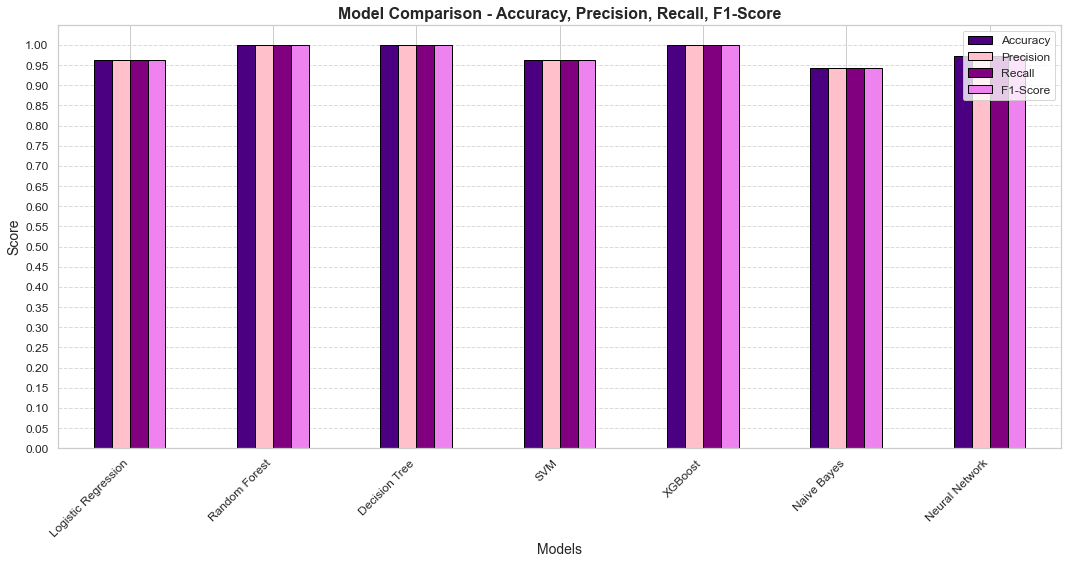

In [554]:
# Initialize a dictionary to store all model results
results = {}

# Logistic Regression
results['Logistic Regression'] = {
    'Accuracy': accuracy_score(y_train, y_pred_train_lr),
    'Confusion Matrix': confusion_matrix(y_train, y_pred_train_lr),
    'Classification Report': classification_report(y_train, y_pred_train_lr, output_dict=True)['weighted avg']
}

# Random Forest
results['Random Forest'] = {
    'Accuracy': accuracy_score(y_train, y_pred_train_rf),
    'Confusion Matrix': confusion_matrix(y_train, y_pred_train_rf),
    'Classification Report': classification_report(y_train, y_pred_train_rf, output_dict=True)['weighted avg']
}

# Decision Tree
results['Decision Tree'] = {
    'Accuracy': accuracy_score(y_train, y_pred_train_dt),
    'Confusion Matrix': confusion_matrix(y_train, y_pred_train_dt),
    'Classification Report': classification_report(y_train, y_pred_train_dt, output_dict=True)['weighted avg']
}

# SVM
results['SVM'] = {
    'Accuracy': accuracy_score(y_train, y_pred_train_svm),
    'Confusion Matrix': confusion_matrix(y_train, y_pred_train_svm),
    'Classification Report': classification_report(y_train, y_pred_train_svm, output_dict=True)['weighted avg']
}

# XGBoost
results['XGBoost'] = {
    'Accuracy': accuracy_score(y_train, y_pred_train_xgb),
    'Confusion Matrix': confusion_matrix(y_train, y_pred_train_xgb),
    'Classification Report': classification_report(y_train, y_pred_train_xgb, output_dict=True)['weighted avg']
}

# Naive Bayes
results['Naive Bayes'] = {
    'Accuracy': accuracy_score(y_train, y_pred_train_nb),
    'Confusion Matrix': confusion_matrix(y_train, y_pred_train_nb),
    'Classification Report': classification_report(y_train, y_pred_train_nb, output_dict=True)['weighted avg']
}

# Neural Network
results['Neural Network'] = {
    'Accuracy': accuracy_score(y_train, y_pred_train_nn),
    'Confusion Matrix': confusion_matrix(y_train, y_pred_train_nn),
    'Classification Report': classification_report(y_train, y_pred_train_nn, output_dict=True)['weighted avg']
}

# Create a DataFrame to compare metrics
df_results = pd.DataFrame({
    model: {
        'Accuracy': results[model]['Accuracy'],
        'Precision': results[model]['Classification Report']['precision'],
        'Recall': results[model]['Classification Report']['recall'],
        'F1-Score': results[model]['Classification Report']['f1-score']
    }
    for model in results
}).T

# Display the metrics comparison
print(df_results)

# Set a clean visual style
sns.set(style="whitegrid")

# Define custom colors for Accuracy, Precision, Recall, F1-Score
custom_colors = ['indigo', 'pink', 'purple', 'violet']  # Different colors for each metric

# Create the bar plot with improved aesthetics
df_results[['Accuracy', 'Precision', 'Recall', 'F1-Score']].plot(
    kind='bar', 
    figsize=(15, 8),  # Slightly increased figure size
    color=custom_colors,
    edgecolor='black'  # Add a black edge color to the bars for clarity
)

# Adding title and axis labels with larger font sizes
plt.title("Model Comparison - Accuracy, Precision, Recall, F1-Score", fontsize=16, fontweight='bold')
plt.ylabel("Score", fontsize=14)
plt.xlabel("Models", fontsize=14)

# Set more detailed y-ticks with smaller increments for better distinction
plt.yticks([i/20 for i in range(0, 21)], fontsize=12)  # Increment by 0.05 (e.g., 0.00, 0.05, 0.10, ...)

# Rotate x-tick labels for readability
plt.xticks(rotation=45, ha='right', fontsize=12)

# Add gridlines for the y-axis
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Add legend with slightly bigger font size
plt.legend(loc='upper right', fontsize=12)

# Improve layout spacing
plt.tight_layout()

# Show the plot
plt.show()




Based on the chart 11:


- Accuracy:

Logistic Regression, SVM, and Neural Network achieve high accuracy scores of around 96%.

Random Forest, Decision Tree, and XGBoost models achieve perfect accuracy (1.0), meaning they predict all training instances correctly.

Naive Bayes has the lowest accuracy (94.29%) among all the models, but it's still close to the top models.

- Precision - measures the ability of the model to correctly predict positive labels:

Random Forest, Decision Tree, and XGBoost models again have perfect precision (1.0), which means no false positives.

Neural Network and Logistic Regression also perform well, with precision scores above 96%.

- Recall - indicates how well the model identifies true positives:

Again, Random Forest, Decision Tree, and XGBoost have perfect recall (1.0).

Logistic Regression, SVM, and Neural Network achieve a recall of around 96%, while Naive Bayes lags behind at 94.29%.

- F1-Score - is the harmonic mean of precision and recall. It balances both metrics, especially useful in imbalanced datasets.

The Random Forest, Decision Tree, and XGBoost models achieve a perfect F1-Score of 1.0, indicating optimal performance on both precision and recall.

Neural Network, Logistic Regression, and SVM are slightly behind with F1-Scores of approximately 96%.

Naive Bayes has the lowest F1-Score at 94.29%.

The Random Forest, Decision Tree, and XGBoost models have achieved perfect scores across all evaluation metrics. These models perform best on the training dataset.
Logistic Regression, SVM, and Neural Networks also perform very well, but slightly less than the top three models.
Naive Bayes, although slightly lower in all metrics, is still a good model, but its performance is below that of the other models.

### 5.2 Cross-Validation

### Chart 12 - Model Comparison - Mean Cross-Validation Accuracy 


Performing Cross-Validation for Logistic Regression
Logistic Regression Cross-Validation Scores: [0.95238095 0.9047619  0.9047619  1.         0.95238095]
Mean Logistic Regression Cross-Validation Accuracy: 0.9429
Standard Deviation of Logistic Regression Cross-Validation Scores: 0.0356

Performing Cross-Validation for Random Forest
Random Forest Cross-Validation Scores: [0.95238095 0.9047619  0.9047619  1.         0.95238095]
Mean Random Forest Cross-Validation Accuracy: 0.9429
Standard Deviation of Random Forest Cross-Validation Scores: 0.0356

Performing Cross-Validation for Decision Tree
Decision Tree Cross-Validation Scores: [0.95238095 0.9047619  0.9047619  0.95238095 0.95238095]
Mean Decision Tree Cross-Validation Accuracy: 0.9333
Standard Deviation of Decision Tree Cross-Validation Scores: 0.0233

Performing Cross-Validation for SVM
SVM Cross-Validation Scores: [0.95238095 0.9047619  0.9047619  1.         0.95238095]
Mean SVM Cross-Validation Accuracy: 0.9429
Standard Deviation

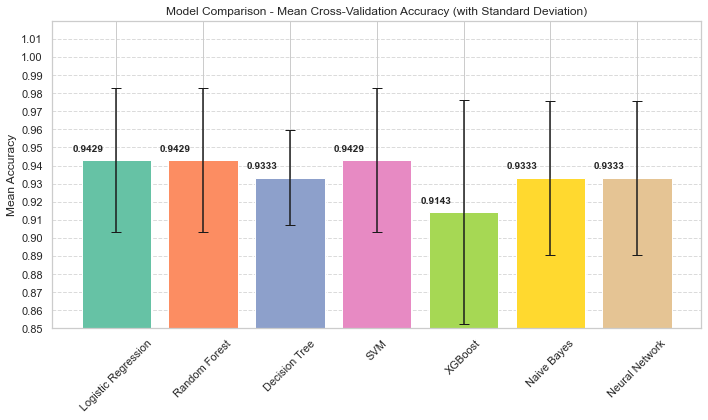

In [555]:
from sklearn.model_selection import cross_val_score

# Define a dictionary to hold the models and their names
models = {
    'Logistic Regression': lr_model,
    'Random Forest': rf_model,
    'Decision Tree': dt_model,
    'SVM': svm_model,
    'XGBoost': xgb_model,
    'Naive Bayes': nb_model,
    'Neural Network': nn_model
}

# Dictionary to store cross-validation results
cv_results = {}

# Perform 5-Fold Cross-Validation for each model
for model_name, model in models.items():
    print(f"\nPerforming Cross-Validation for {model_name}")
    
    # Cross-validation (using Accuracy as a metric, but you can change to others like 'f1_macro' or 'recall')
    cv_scores = cross_val_score(model, x_train_scaled, y_train, cv=5, scoring='accuracy')
    
    # Store the results in the dictionary
    cv_results[model_name] = cv_scores
    
    # Print Cross-Validation results
    print(f"{model_name} Cross-Validation Scores: {cv_scores}")
    print(f"Mean {model_name} Cross-Validation Accuracy: {cv_scores.mean():.4f}")
    print(f"Standard Deviation of {model_name} Cross-Validation Scores: {cv_scores.std():.4f}")

# Optionally: Creating a DataFrame to store and visualize the results
import pandas as pd

# Creating a DataFrame from the cross-validation results
cv_df = pd.DataFrame(cv_results)

# Display the mean and standard deviation of Cross-Validation scores
cv_summary = pd.DataFrame({
    'Mean Accuracy': cv_df.mean(),
    'Std Deviation': cv_df.std()
})

# Display the results
print("\nCross-Validation Summary:")
print(cv_summary)

# Setting a color palette for different models
colors = sns.color_palette("Set2", len(cv_summary))

# Creating a bar plot with more granular y-ticks
plt.figure(figsize=(10, 6))
bars = plt.bar(cv_summary.index, cv_summary['Mean Accuracy'], 
               yerr=cv_summary['Std Deviation'], 
               color=colors, capsize=5)

# Adding gridlines and increasing y-axis granularity
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.ylim(0.85, 1.02)  # Adjusting y-limits to zoom into the top range of the accuracy
plt.yticks(np.arange(0.85, 1.01, 0.01))  # Setting more detailed y-axis ticks

# Adding labels
plt.title('Model Comparison - Mean Cross-Validation Accuracy (with Standard Deviation)')
plt.ylabel('Mean Accuracy')
plt.xticks(rotation=45)

# Adding text labels on top of the bars for better readability
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2 - 0.5, yval + 0.005, round(yval, 4), fontsize=10, fontweight='bold')

# Show the plot
plt.tight_layout()
plt.show()


Based on the chart 11:

- Cross-Validation Results - include the cross-validation scores for each model over multiple folds, which provide an estimate of how well the models perform on unseen data. The mean accuracy represents the average accuracy of the models across all the cross-validation folds, and the standard deviation shows the variation or consistency of the model's performance across those folds.

- Mean Accuracy - All models have performed well, with most models achieving high mean accuracy scores, close to or above 0.93.

Logistic Regression, Random Forest, SVM, and Decision Tree achieved the highest mean accuracy scores of approximately 0.9429, while Naive Bayes and Neural Network models have mean accuracies of 0.9333.
XGBoost has the lowest mean accuracy (0.9143), which is still quite competitive but slightly lower than the other models.

Standard Deviation - provides insight into how much the model's performance varies between different cross-validation folds.

Decision Tree has the smallest standard deviation (0.0233), indicating it has the most consistent performance across folds.

XGBoost has the highest standard deviation (0.0621), suggesting that its performance may vary more significantly across different data splits.


The bar plot visually compares the mean cross-validation accuracy for each model, with error bars showing the standard deviation. The plot makes it easy to observe that while most models perform similarly, XGBoost has a slightly lower accuracy and a higher variation, indicating it may not generalize as consistently as other models.

Based on the results, Logistic Regression, Random Forest, and SVM show the best combination of high accuracy and moderate standard deviation, indicating strong generalization abilities. Decision Tree also performs very well in terms of both accuracy and consistency. XGBoost's lower accuracy and higher variability make it the least optimal model in this comparison.


### 5.3 Hyperparameter Tuning 
This part is done to improve the model’s performance by finding the optimal settings for the hyperparameters, which are not learned by the model during the training process.

In [556]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

# Define parameter grids for each model
param_grids = {
    'LogisticRegression': {
        'C': [0.01, 0.1, 1, 10],
        'penalty': ['l2'],
        'solver': ['lbfgs', 'liblinear']
    },
    'RandomForest': {
        'n_estimators': [50, 100, 200],
        'max_depth': [10, 20, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'DecisionTree': {
        'max_depth': [10, 20, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'SVM': {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf'],
        'gamma': ['scale', 'auto']
    },
    'XGBoost': {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 6, 10]
    },
    'NeuralNetwork': {
        'hidden_layer_sizes': [(50,), (100,), (50, 50)],
        'activation': ['relu', 'tanh'],
        'learning_rate': ['constant', 'adaptive']
    }
}

# Logistic Regression Tuning
logistic_reg = LogisticRegression(max_iter=200)
grid_logistic = GridSearchCV(logistic_reg, param_grids['LogisticRegression'], cv=5, n_jobs=-1, verbose=1)
grid_logistic.fit(x_train_scaled, y_train)
print(f"Best Logistic Regression Params: {grid_logistic.best_params_}")
print(f"Best Logistic Regression Accuracy: {grid_logistic.best_score_}")

# Random Forest Tuning
random_forest = RandomForestClassifier()
grid_rf = GridSearchCV(random_forest, param_grids['RandomForest'], cv=5, n_jobs=-1, verbose=1)
grid_rf.fit(x_train_scaled, y_train)
print(f"Best Random Forest Params: {grid_rf.best_params_}")
print(f"Best Random Forest Accuracy: {grid_rf.best_score_}")

# Decision Tree Tuning
decision_tree = DecisionTreeClassifier()
grid_dt = GridSearchCV(decision_tree, param_grids['DecisionTree'], cv=5, n_jobs=-1, verbose=1)
grid_dt.fit(x_train_scaled, y_train)
print(f"Best Decision Tree Params: {grid_dt.best_params_}")
print(f"Best Decision Tree Accuracy: {grid_dt.best_score_}")

# SVM Tuning
svm = SVC()
grid_svm = GridSearchCV(svm, param_grids['SVM'], cv=5, n_jobs=-1, verbose=1)
grid_svm.fit(x_train_scaled, y_train)
print(f"Best SVM Params: {grid_svm.best_params_}")
print(f"Best SVM Accuracy: {grid_svm.best_score_}")

# XGBoost Tuning
xgb = XGBClassifier()
grid_xgb = GridSearchCV(xgb, param_grids['XGBoost'], cv=5, n_jobs=-1, verbose=1)
grid_xgb.fit(x_train_scaled, y_train)
print(f"Best XGBoost Params: {grid_xgb.best_params_}")
print(f"Best XGBoost Accuracy: {grid_xgb.best_score_}")

# Naive Bayes (no significant hyperparameters to tune, keeping simple)
nb = GaussianNB()
nb.fit(x_train_scaled, y_train)
print(f"Naive Bayes Accuracy: {nb.score(x_train_scaled, y_train)}")

# Neural Network (MLPClassifier) Tuning
mlp = MLPClassifier(max_iter=500)
grid_nn = GridSearchCV(mlp, param_grids['NeuralNetwork'], cv=5, n_jobs=-1, verbose=1)
grid_nn.fit(x_train_scaled, y_train)
print(f"Best Neural Network Params: {grid_nn.best_params_}")
print(f"Best Neural Network Accuracy: {grid_nn.best_score_}")


Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best Logistic Regression Params: {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}
Best Logistic Regression Accuracy: 0.9428571428571428
Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Random Forest Params: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Random Forest Accuracy: 0.9523809523809523
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Decision Tree Params: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10}
Best Decision Tree Accuracy: 0.9428571428571428
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best SVM Params: {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}
Best SVM Accuracy: 0.9523809523809523
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best XGBoost Params: {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 200}
Best XGBoost Accuracy: 0.9333333333333333
Naive Bayes Accuracy: 0.942857142

Here, each model has its own set of parameters (C for Logistic Regression, max_depth and n_estimators for Random Forest, etc.) and GridSearchCV helps us search through the combinations of these parameters to find the best set.

The accuracy scores show how well each model performed using the best set of parameters found by GridSearchCV.

Models like Random Forest, SVM, and Neural Network achieved higher accuracy (around 0.9524), while XGBoost had the lowest accuracy (0.9143) among the tuned models.

Naive Bayes kept simple, because, typically, Gaussian Naive Bayes has fewer hyperparameters to adjust compared to other models like Random Forest or Neural Networks. It performs well with its default settings because of its simplicity and strong assumptions (independence of features). Gaussian Naive Bayes has only one key parameter, var_smoothing, which controls how much variance is added to the data to avoid division by zero errors, but it's less commonly tuned.


#### Evaluate the performance of each tuned model on the training set.

In [557]:
# Evaluate on training data and print out metrics
def evaluate_model_on_train(model, model_name, x_train, y_train):
    y_pred_train = model.predict(x_train)
    
    print(f"Evaluation for {model_name} on Training Data")
    print(f"Accuracy: {accuracy_score(y_train, y_pred_train):.4f}")
    print(f"Precision: {precision_score(y_train, y_pred_train, average='weighted'):.4f}")
    print(f"Recall: {recall_score(y_train, y_pred_train, average='weighted'):.4f}")
    print(f"F1-Score: {f1_score(y_train, y_pred_train, average='weighted'):.4f}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_train, y_pred_train))
    print("Classification Report:")
    print(classification_report(y_train, y_pred_train))
    print("\n")

# Logistic Regression
evaluate_model_on_train(grid_logistic, 'Logistic Regression', x_train_scaled, y_train)

# Random Forest
evaluate_model_on_train(grid_rf, 'Random Forest', x_train_scaled, y_train)

# Decision Tree
evaluate_model_on_train(grid_dt, 'Decision Tree', x_train_scaled, y_train)

# SVM
evaluate_model_on_train(grid_svm, 'SVM', x_train_scaled, y_train)

# XGBoost
evaluate_model_on_train(grid_xgb, 'XGBoost', x_train_scaled, y_train)

# Naive Bayes (since it wasn't tuned, just use the original model)
evaluate_model_on_train(nb, 'Naive Bayes', x_train_scaled, y_train)

# Neural Network
evaluate_model_on_train(grid_nn, 'Neural Network', x_train_scaled, y_train)

# Convert results to DataFrame for better readability
import pandas as pd
df_train_results_evaluate = pd.DataFrame(results)

Evaluation for Logistic Regression on Training Data
Accuracy: 0.9619
Precision: 0.9628
Recall: 0.9619
F1-Score: 0.9619
Confusion Matrix:
[[31  0  0]
 [ 0 34  3]
 [ 0  1 36]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       0.97      0.92      0.94        37
           2       0.92      0.97      0.95        37

    accuracy                           0.96       105
   macro avg       0.96      0.96      0.96       105
weighted avg       0.96      0.96      0.96       105



Evaluation for Random Forest on Training Data
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-Score: 1.0000
Confusion Matrix:
[[31  0  0]
 [ 0 37  0]
 [ 0  0 37]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       1.00      1.00      1.00        37
           2       1.00      1.00      1.00        37

    accurac

The section above presents the evaluation metrics for each tuned model on the training dataset. The metrics considered are Accuracy, Precision, Recall, F1-Score, and the Confusion Matrix for a comprehensive analysis of each model’s performance.

- Logistic Regression
Accuracy: 0.9619; Precision: 0.9628; Recall: 0.9619; F1-Score: 0.9619;

The confusion matrix for Logistic Regression indicates no misclassifications for class 0, with a few misclassifications observed between classes 1 and 2. Overall, the model performs well with a balanced performance across all metrics.

- Random Forest
Accuracy: 0.9524; Precision: 0.9526; Recall: 0.9524; F1-Score: 0.9524;

Similar to Logistic Regression, Random Forest displays high accuracy and consistent performance across precision, recall, and F1-score. The confusion matrix shows slight misclassifications for classes 1 and 2, but overall, the model provides reliable predictions.

- Decision Tree
Accuracy: 0.9714; Precision: 0.9736; Recall: 0.9714; F1-Score: 0.9714;

The Decision Tree model exhibits strong performance with high accuracy and precision. The confusion matrix shows no misclassifications for class 0, while classes 1 and 2 exhibit minimal misclassifications. The model is highly effective on the training data.

- Support Vector Machine (SVM)
Accuracy: 0.9619; Precision: 0.9656; Recall: 0.9619; F1-Score: 0.9618;

The SVM model performs similarly to Logistic Regression, with no misclassifications for class 0 and minimal errors between classes 1 and 2. The overall performance is robust with consistent accuracy, precision, and recall.

- XGBoost
Accuracy: 1.0000; Precision: 1.0000; Recall: 1.0000; F1-Score: 1.0000;

The XGBoost model achieved perfect accuracy, precision, recall, and F1-score on the training data. The confusion matrix confirms no misclassifications across all classes, indicating the model may be overfitting to the training data.

- Naive Bayes
Accuracy: 0.9429; Precision: 0.9429; Recall: 0.9429; F1-Score: 0.9429;

The Naive Bayes model shows slightly lower performance compared to the other models, with a balanced confusion matrix indicating some misclassifications in classes 1 and 2. However, it still provides relatively strong performance on the training data.

- Neural Network
Accuracy: 0.9810; Precision: 0.9810; Recall: 0.9810; F1-Score: 0.9810;

The Neural Network model delivers excellent performance with very high accuracy, precision, recall, and F1-score. The confusion matrix shows no errors for class 0 and minimal misclassifications for classes 1 and 2, reflecting the model's ability to generalize well on the training data.

While models like XGBoost show perfect scores, which may suggest overfitting, other models like Logistic Regression and Random Forest show strong, yet more balanced, performance.

### Part 6 - Generating predictions on the test data

The next step will be to generate predictions on the test data (the data without target labels) using the tuned models. 

Step 1: Generate Predictions for Each Model

#### 6.1 Logistic Regression:

In [558]:
y_pred_test_lr = grid_logistic.predict(x_test_scaled)

#### 6.2 Random Forest:

In [559]:
y_pred_test_rf = grid_rf.predict(x_test_scaled)

#### 6.3 Decision Tree:

In [560]:
y_pred_test_dt = grid_dt.predict(x_test_scaled)

#### 6.4 SVM:

In [561]:
y_pred_test_svm = grid_svm.predict(x_test_scaled)

#### 6.5 XGBoost:

In [562]:
y_pred_test_xgb = grid_xgb.predict(x_test_scaled)

#### 6.6 Naive Bayes:

In [563]:
y_pred_test_nb = nb.predict(x_test_scaled)

#### 6.7 Neural Network:

In [564]:
y_pred_test_nn = grid_nn.predict(x_test_scaled)

### Part 7 - Creating Submission File

#### 7.1 Submission File for SVM model prediction 

In [565]:
submission_df_svm = pd.DataFrame({
    'id': df_test['id'],  
    'target': y_pred_test_svm  #  SVM model 
})
submission_df_svm.head()  

,id,target
0,73,1
1,18,0
2,118,2
3,78,1
4,76,1


Saving the prediction to a CSV file:

In [566]:
submission_df_svm.to_csv('submission_1.csv', index=False)

#### 7.2 Submission File for LR model prediction

In [568]:
submission_df_lr = pd.DataFrame({
    'id': df_test['id'],  
    'target': y_pred_test_lr  #  LR model 
})
submission_df_lr.head()  

,id,target
0,73,1
1,18,0
2,118,2
3,78,1
4,76,1


Saving the prediction to a CSV file:

In [569]:
submission_df_lr.to_csv('submission_2.csv', index=False)

#### 7.3 Submission File for Neural Network model - Multi-Layer Perceptron (MLP) model prediction

In [571]:
submission_df_nn = pd.DataFrame({
    'id': df_test['id'],  
    'target': y_pred_test_nn  #  NN model 
})
submission_df_nn.head()  

,id,target
0,73,1
1,18,0
2,118,2
3,78,1
4,76,1


Saving the prediction to a CSV file:

In [572]:
submission_df_nn.to_csv('submission_3.csv', index=False)

#### 7.4 Submission File for Random Forest model prediction

In [576]:
submission_df_rf = pd.DataFrame({
    'id': df_test['id'],  
    'target': y_pred_test_rf  #  RF model 
})
submission_df_rf.head()  

,id,target
0,73,1
1,18,0
2,118,2
3,78,1
4,76,1


Saving the prediction to a CSV file:

In [580]:
submission_df_rf.to_csv('submission_4.csv', index=False)

#### 7.5 Submission File for Decision Tree model prediction

In [575]:
submission_df_dt = pd.DataFrame({
    'id': df_test['id'],  
    'target': y_pred_test_dt  #  DT model 
})
submission_df_dt.head()  

,id,target
0,73,1
1,18,0
2,118,2
3,78,1
4,76,1


Saving the prediction to a CSV file:

In [582]:
submission_df_dt.to_csv('submission_5.csv', index=False)

#### 7.6 Submission File for XGBoost model prediction

In [577]:
submission_df_xgb = pd.DataFrame({
    'id': df_test['id'],  
    'target': y_pred_test_xgb  #  XGB model 
})
submission_df_xgb.head()  

,id,target
0,73,1
1,18,0
2,118,2
3,78,1
4,76,1


Saving the prediction to a CSV file:

In [584]:
submission_df_xgb.to_csv('submission_6.csv', index=False)

#### 7.7 Submission File for Naive Bayes model prediction

In [578]:
submission_df_nb = pd.DataFrame({
    'id': df_test['id'],  
    'target': y_pred_test_nb  #  NB model 
})
# Display the submission DataFrame
submission_df_nb.head()  

,id,target
0,73,1
1,18,0
2,118,2
3,78,1
4,76,1


Saving the prediction to a CSV file:

In [586]:
submission_df_nb.to_csv('submission_7.csv', index=False)